<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Pred_cancelac_reserva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikeras

In [ ]:
#Analisis de datos
import pandas as pd #Calculos númericos
import numpy as np #Manipulación de datos de DF
import matplotlib.pyplot as plt #Graficas
import seaborn as sns #Graficos

#Machine learning
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split #División de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler #Estandarización
from sklearn.preprocessing import MinMaxScaler #Normalización

from sklearn.model_selection import train_test_split

#Redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier #metodo para invocar nuestra función que construye la red

from keras.optimizers import SGD, Adagrad, Adadelta
from keras.models import Sequential
from keras.initializers import HeNormal, GlorotNormal
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import MaxNorm

from keras.layers import Dropout

### <font color = 'green'> PREDICIÓN DE CANCELACIÓN DE RESERVA

##### <font color = 'blue'> PREPROCESAMIENTO DE DATOS

In [ ]:
df = pd.read_csv("hotel_bookings.csv")

In [ ]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [ ]:
df.tail()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17
119389,119389,City Hotel,0,205,2017,August,35,29,2,7,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-17


In [ ]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### <font color = "green"> TARGET (Y) = is_canceled

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df1 = df.copy()

In [ ]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.shape

(119390, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [ ]:
df_nuevo = df.drop(columns=["index", "arrival_date_year", "agent", "country", "company", "reservation_status", "reservation_status_date"])

In [ ]:
df_nuevo.shape[1]

26

In [ ]:
df_nuevo.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [ ]:
df_nuevo["children"].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [ ]:
df_nuevo["children"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: children, dtype: float64

In [ ]:
# Revisar el porcentaje de valores ausentes para la columna children
missing_percentage = df_nuevo["children"].isnull().mean() * 100
print(missing_percentage)

# Si el porcentaje de valores ausentes es menor al 4%, eliminar los registros
if missing_percentage < 4:
    df_nuevo = df_nuevo.dropna(subset=["children"])

# Si el porcentaje de valores ausentes es mayor o igual al 4%, reemplazar por el promedio de la clase
else:
    if df_nuevo["children"].dtype in ['float64', 'int64']:
        df_nuevo["children"].fillna(df_nuevo["children"].mean(), inplace=True)

0.003350364352123293


In [ ]:
df_nuevo["children"].isnull().sum()

0

##### <font color = "black"> Para los registros donde el % de isnull es mayor o igual al 4%, se decide reemplazar por el promedio teniendo en cuenta que los datos no se encuentran tan dispersos y que la std es relativamente moderada en coomparación con la cantidad total de registros. Para datos más dispersos, hubiese sido más estrategico rellenar con la mediana.

In [ ]:
df_nuevo.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

### <font color = "green"> Variables relevantes con respecto a cancelar una reserva:

#### <font color = "black"> deposit_type, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled y booking_changes

##### Sí el cliente realiza un deposito a la reserva, puede existir una tendencia a que disminuya la probabilidad de cancelarla. De igual manera, sí se aloja un huesped repetido, posiblemente sea un cliente satisfecho con el servicio en las anteriores ocasiones y quiera repetir la experiencia; siendo así un huesped nuevo tiene analiticamente una probabilidad un poco mayor a cancelar la reserva que uno que ya se ha alojado una o varias veces con anterioridad en el mismo lugar. Finalmente, las cancelaciones previas y los cambios en la reserva pueden ser un indicativo o variables relevantes también con respecto a sí un cliente cancelará o no una reserva.

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='adr', ylabel='Count'>

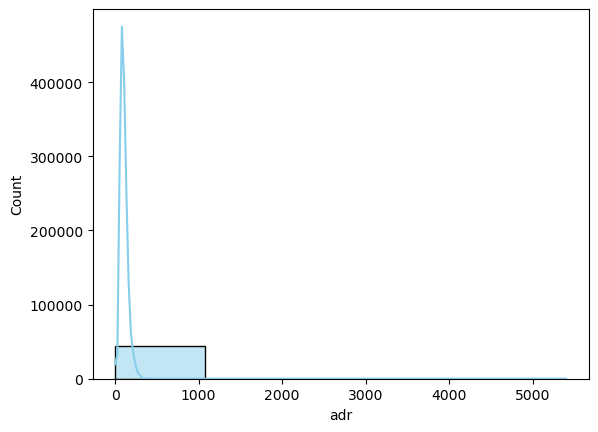

In [ ]:
sns.histplot(data=df_nuevo[df_nuevo["is_canceled"] == 1], x="adr", bins=5, kde=True, color='skyblue')

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


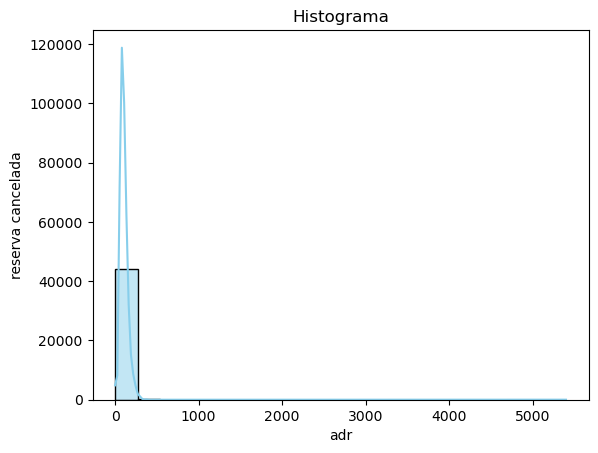

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


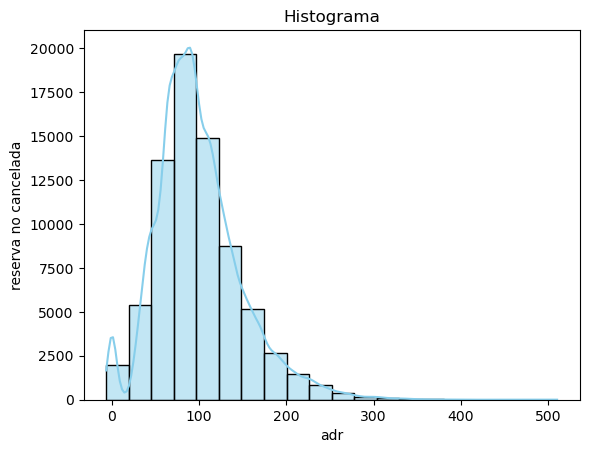

CPU times: total: 1.89 s
Wall time: 1.53 s


In [ ]:
%%time
sns.histplot(data=df_nuevo[df_nuevo["is_canceled"] == 1], x="adr", bins=20, kde=True, color='skyblue')

plt.title("Histograma")
plt.xlabel("adr")
plt.ylabel("reserva cancelada")
plt.show()

sns.histplot(data=df_nuevo[df_nuevo["is_canceled"] == 0], x="adr", bins=20, kde=True, color='skyblue')

plt.title("Histograma")
plt.xlabel("adr")
plt.ylabel("reserva no cancelada")
plt.show()

##### Para reservas canceladas, la tarifa media tiende a cero. Para reservas no canceladas, el grafico sigue un comportamiento más normal.

Limite inferior: -15.774999999999991
Limite superior: 211.065
IQR: 56.709999999999994
La cantidad de outliers por debajo es: 0
La cantidad de outliers por encima es: 3793


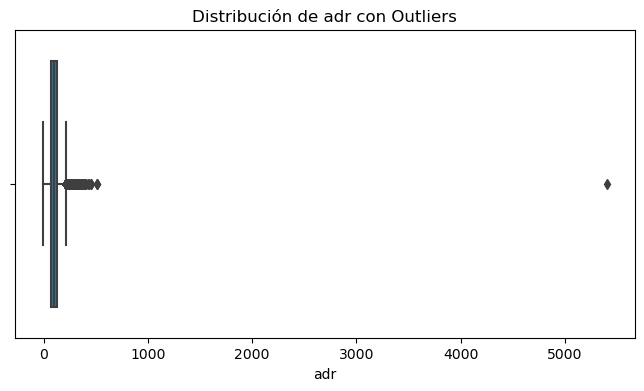

In [ ]:
#Columna adr
#método de rango intercuartílico
Q1 = df_nuevo["adr"].quantile(0.25)
Q3 = df_nuevo["adr"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df_nuevo[(df_nuevo["adr"] < Limite_inferior) | (df_nuevo["adr"] > Limite_superior)]

Outliers_por_debajo = (df_nuevo["adr"] < Limite_inferior).sum()
Outliers_por_encima = (df_nuevo["adr"] > Limite_superior).sum()

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")
print(f"La cantidad de outliers por debajo es: {Outliers_por_debajo}")
print(f"La cantidad de outliers por encima es: {Outliers_por_encima}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_nuevo["adr"])
plt.title("Distribución de adr con Outliers")
plt.xlabel("adr")
plt.show()

In [ ]:
# No tenemos cantidad de outliers por debajo
# Solo trabajamos con los extremos altos
extremos_altos = df_nuevo.nlargest(3, "adr").index

# Eliminar esos extremos
df_sin_extremos = df_nuevo.drop(extremos_altos)

# Para los demás outliers, reemplazar por el promedio
promedio = df_sin_extremos["adr"].mean()

condicion_outliers = (df_sin_extremos["adr"] > Limite_superior)
df_sin_extremos.loc[condicion_outliers, "adr"] = promedio

print(f"Tamaño original: {len(df_nuevo)}")
print(f"Tamaño sin extremos: {len(df_sin_extremos)}")

Tamaño original: 119386
Tamaño sin extremos: 119383


Limite inferior: -6.7749999999999915
Limite superior: 196.065
IQR: 50.709999999999994
La cantidad de outliers por debajo es: 0
La cantidad de outliers por encima es: 1763


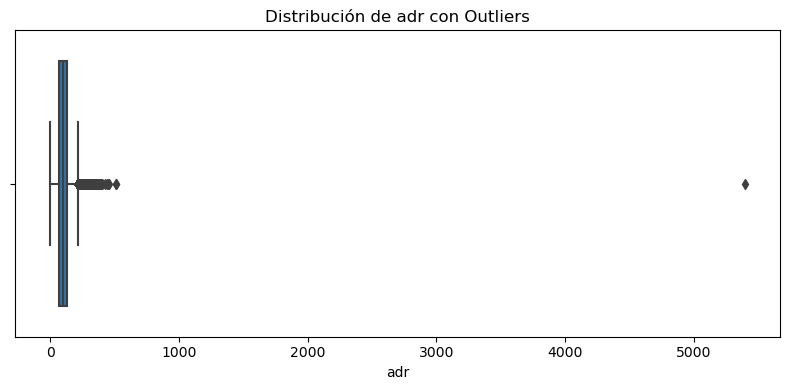

In [ ]:
#Columna adr
#método de rango intercuartílico
Q1 = df_sin_extremos["adr"].quantile(0.25)
Q3 = df_sin_extremos["adr"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df_sin_extremos[(df_sin_extremos["adr"] < Limite_inferior) | (df_sin_extremos["adr"] > Limite_superior)]

Outliers_por_debajo = (df_sin_extremos["adr"] < Limite_inferior).sum()
Outliers_por_encima = (df_sin_extremos["adr"] > Limite_superior).sum()

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")
print(f"La cantidad de outliers por debajo es: {Outliers_por_debajo}")
print(f"La cantidad de outliers por encima es: {Outliers_por_encima}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_nuevo["adr"])
plt.title("Distribución de adr con Outliers")
plt.tight_layout()
plt.xlabel("adr")
plt.show()

##### Se puede observar que en este segundo análisis de outliers para la variable, los datos dispersos por encima del lim superior y el IQR disminuyeron. De lo anterior, se concluye que el método utilizado para rellenar los valores restantes por el promedio ayudo a reducir outliers.

In [ ]:
df_sin_extremos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119383 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119383 non-null  object 
 1   is_canceled                     119383 non-null  int64  
 2   lead_time                       119383 non-null  int64  
 3   arrival_date_month              119383 non-null  object 
 4   arrival_date_week_number        119383 non-null  int64  
 5   arrival_date_day_of_month       119383 non-null  int64  
 6   stays_in_weekend_nights         119383 non-null  int64  
 7   stays_in_week_nights            119383 non-null  int64  
 8   adults                          119383 non-null  int64  
 9   children                        119383 non-null  float64
 10  babies                          119383 non-null  int64  
 11  meal                            119383 non-null  object 
 12  market_segment       

In [ ]:
# Transformar variables categoricas en variables dummies
df_dummies = pd.get_dummies(df_sin_extremos, drop_first=True)

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119383 entries, 0 to 119389
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119383 non-null  int64  
 1   lead_time                       119383 non-null  int64  
 2   arrival_date_week_number        119383 non-null  int64  
 3   arrival_date_day_of_month       119383 non-null  int64  
 4   stays_in_weekend_nights         119383 non-null  int64  
 5   stays_in_week_nights            119383 non-null  int64  
 6   adults                          119383 non-null  int64  
 7   children                        119383 non-null  float64
 8   babies                          119383 non-null  int64  
 9   is_repeated_guest               119383 non-null  int64  
 10  previous_cancellations          119383 non-null  int64  
 11  previous_bookings_not_canceled  119383 non-null  int64  
 12  booking_changes      

In [ ]:
df_sin_extremos = df_dummies

In [ ]:
df_sin_extremos.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,27,1,0,2,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df_sin_extremos.shape

(119383, 68)

In [ ]:
X = pd.get_dummies(df_sin_extremos.drop("is_canceled", axis=1), drop_first=True)
y = df_sin_extremos["is_canceled"]

# Dividir en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Estandarizar solo variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_text_scaled = scaler.transform (X_test)

##### <font color = "BLUE"> REDES NEURONALES

In [ ]:
X_train.shape[1]

67

#### Implementación de dos modelos de red neuronal multicapa, considerando las siguientes características:

a. Cada modelo debe contar con tres capas ocultas.

b. El primer modelo debe tener funciones de activación tanh, relu y tanh en las capas ocultas, mientras que el segundo sólo funciones tanh en sus capas
ocultas.

c. Cada modelo debe tener un mínimo de 20 neuronas para cada capa oculta.

d. Usar un optimizador SGD, con 10 épocas de entrenamiento; cada capa deberá tener una neurona de sesgo. Debes decidir cómo se inicializan los pesos y el sesgo en cada capa oculta y de salida.


In [ ]:
%%time
# Modelo 1
# Usamos relu y tanh como funciones de activación de las capas ocultas
# SGD
# 10 epocas y min 20 neuronas

from tensorflow.keras.initializers import HeNormal, GlorotUniform, Zeros

model = Sequential()

# Capa de entrada donde se establece las dimensiones de las observaciones
model.add(keras.Input(shape=(X_train.shape[1], )))

# Capa oculta 1
model.add(Dense(450, activation='relu',
                use_bias=True,
                kernel_initializer=HeNormal(),
                bias_initializer=Zeros()))

# Capa oculta 2
model.add(Dense(450, activation='tanh',
                use_bias=True,
                kernel_initializer=GlorotUniform(),
                bias_initializer=Zeros()))

# Capa oculta 3
model.add(Dense(450, activation='relu',
                use_bias=True,
                kernel_initializer=HeNormal(),
                bias_initializer=Zeros()))

# Capa de salida
model.add(Dense(1, activation='sigmoid',
                use_bias=True,
                kernel_initializer=GlorotUniform(),
                bias_initializer=Zeros()))

# Optimizador: Descenso del gradiente estocástico
optimizer = SGD(learning_rate=0.0001)

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

model.summary()

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.6975 - loss: 0.5961
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.7222 - loss: 0.5794
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.7287 - loss: 0.5749
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7334 - loss: 0.5719
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7361 - loss: 0.5697
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.7392 - loss: 0.5676
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.7417 - loss: 0.5657
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7441 - loss: 0.5639
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7470 - loss: 0.5619
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.7493 - loss: 0.5600


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)               │ (None, 450)            │        30,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 450)            │       202,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 450)            │       202,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │           451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,953 (1.67 MB)

 Trainable params: 436,951 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

CPU times: total: 1min 55s
Wall time: 1min 23s


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
AUC: 0.7530


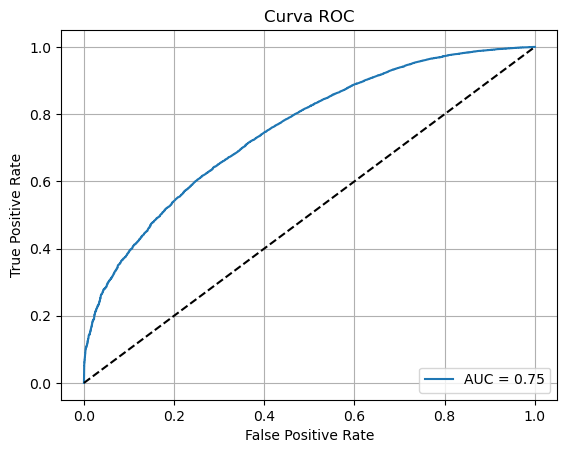

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve #Metricas de evaluación clasificatorias

# Obtener probabilidades predichas
y_pred_proba = model.predict(X_train).ravel()

# Calcular AUC
auc = roc_auc_score(y_train, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Graficar
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#Modelo 2
# Usamos solo tanh como funcion de activación de las capas ocultas

model2 = Sequential()

# Capa de entrada donde se establece las dimensiones de las observaciones
model2.add(keras.Input(shape=(X_train.shape[1], )))

# Capa oculta 1
model2.add(Dense(200, activation='tanh',
                use_bias=True,
                kernel_initializer=HeNormal(),
                bias_initializer=Zeros()))

# Capa oculta 2
model2.add(Dense(200, activation='tanh',
                use_bias=True,
                kernel_initializer=GlorotUniform(),
                bias_initializer=Zeros()))

# Capa oculta 3
model2.add(Dense(200, activation='tanh',
                use_bias=True,
                kernel_initializer=HeNormal(),
                bias_initializer=Zeros()))

# Capa de salida
model2.add(Dense(1, activation='sigmoid',
                use_bias=True,
                kernel_initializer=GlorotUniform(),
                bias_initializer=Zeros()))

# Optimizador: Descenso del gradiente estocástico
optimizer = SGD(learning_rate=0.001)

# Compilar el modelo
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Entrenar el modelo
history = model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

model2.summary()

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - AUC: 0.6896 - loss: 0.6029
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7137 - loss: 0.5856
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7202 - loss: 0.5807
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.7251 - loss: 0.5769
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7304 - loss: 0.5730
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7334 - loss: 0.5707
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.7388 - loss: 0.5666
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.7417 - loss: 0.5640
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.7466 - loss: 0.5604
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.7503 - loss: 0.5575


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 200)            │        13,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,203 (367.98 KB)

 Trainable params: 94,201 (367.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
AUC: 0.7642


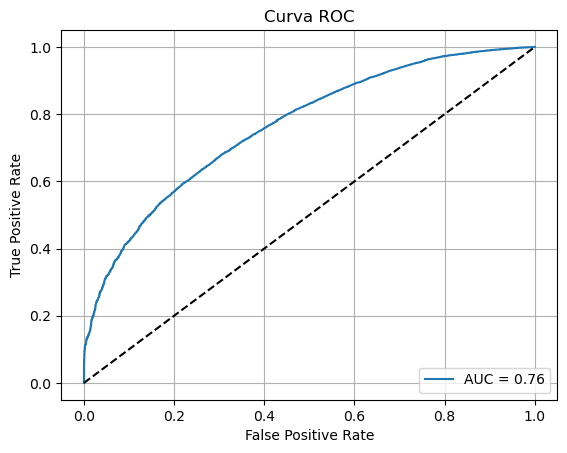

In [ ]:
# Obtener probabilidades predichas
y_pred_proba = model2.predict(X_train).ravel()

# Calcular AUC
auc = roc_auc_score(y_train, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Graficar
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

AUC por encima de 0.75 para ambos modelos.

El modelo 2 funciona mejor mediante función de activación tanh para las 3 capas ocultas y con menos neuronas.

In [ ]:
model3 = Sequential()

In [ ]:
#Modelo 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import glorot_normal, glorot_uniform, HeNormal
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

def create_model(n_neurons=20, activation='tanh', dropout_rate=0.001, learning_rate=0.03, meta={}):
    n_features_in_ = meta["n_features_in_"]
    constraint = MaxNorm(max_value=3)

    model3 = Sequential()
    model3.add(Dense(
        n_neurons,
        activation=activation,
        use_bias=True,
        kernel_initializer=glorot_normal(),
        bias_initializer='zeros',
        input_shape=(n_features_in_,)
    ))

    model3.add(Dense(
        n_neurons,
        activation=activation,
        use_bias=True,
        kernel_initializer=glorot_uniform(),
        bias_initializer='zeros'
    ))

    model3.add(Dense(
        n_neurons,
        activation=activation,
        use_bias=True,
        kernel_initializer=glorot_normal(),
        bias_initializer='zeros'
    ))

    model3.add(Dropout(rate=dropout_rate))

    model3.add(Dense(
        units=1,
        activation='sigmoid',
        kernel_initializer=HeNormal(),
        bias_initializer='zeros',
        kernel_regularizer=l1(l1=0.001),
        kernel_constraint=constraint
    ))

    optimizer = Adam(learning_rate=learning_rate)
    model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model3

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

clf = KerasClassifier(
    model=create_model,
    verbose=0
)

param_grid = {
    'model__n_neurons': [20, 30],
    'model__activation': ['tanh'],
    'batch_size': [300],
    'epochs': [5, 6],
    'model__learning_rate': [0.03, 0.06],
    'model__dropout_rate': [0.001]
}

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

grid_result = grid.fit(X_train, y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

C:\Users\Usuario\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Usuario\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Usuario\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C

Best: 0.7991898582251894 using {'batch_size': 300, 'epochs': 6, 'model__activation': 'tanh', 'model__dropout_rate': 0.001, 'model__learning_rate': 0.03, 'model__n_neurons': 30}


In [ ]:
from sklearn.metrics import classification_report

yhat_class = grid_result.best_estimator_.predict(X_test)

y_test_class = y_test

print(classification_report(y_test_class, yhat_class))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     24747
           1       0.69      0.70      0.70     14650

    accuracy                           0.77     39397
   macro avg       0.75      0.76      0.76     39397
weighted avg       0.77      0.77      0.77     39397



#### <font color = green > HIPERPARAMETROS OPTIMOS:

##### Best: 0.7839871977596079 using {'batch_size': 300, 'epochs': 5, 'model__activation': 'tanh', 'model__dropout_rate': 0.001, 'model__learning_rate': 0.03, 'model__n_neurons': 30}

In [ ]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


C:\Users\Usuario\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


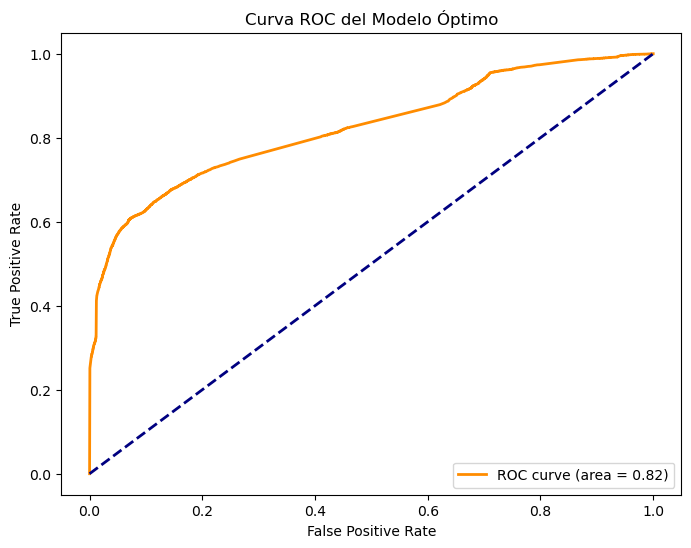

In [ ]:
#Modelo 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.initializers import glorot_normal, glorot_uniform, HeNormal
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def create_model(n_neurons=30, activation='tanh', dropout_rate=0.001, learning_rate=0.03, n_features_in_=X_train.shape[1]):
    constraint = MaxNorm(max_value=3)

    model4 = Sequential()
    model4.add(Dense(
        n_neurons,
        activation=activation,
        use_bias=True,
        kernel_initializer=glorot_normal(),
        bias_initializer='zeros',
        input_shape=(n_features_in_,)
    ))
    model4.add(Dense(
        n_neurons,
        activation=activation,
        use_bias=True,
        kernel_initializer=glorot_uniform(),
        bias_initializer='zeros'
    ))
    model4.add(Dense(
        n_neurons,
        activation=activation,
        use_bias=True,
        kernel_initializer=glorot_normal(),
        bias_initializer='zeros'
    ))
    model4.add(Dropout(rate=dropout_rate))
    model4.add(Dense(
        units=1,
        activation='sigmoid',
        kernel_initializer=HeNormal(),
        bias_initializer='zeros',
        kernel_regularizer=l1(l1=0.001),
        kernel_constraint=constraint
    ))

    optimizer = Adam(learning_rate=learning_rate)
    model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model4

# Hiperparámetros óptimos
best_params = {
    'batch_size': 300,
    'epochs': 5,
    'model__activation': 'tanh',
    'model__dropout_rate': 0.001,
    'model__learning_rate': 0.03,
    'model__n_neurons': 30
}

# Crear el clasificador
clf = KerasClassifier(
    model=create_model,
    verbose=0,
    model__n_neurons=best_params['model__n_neurons'],
    model__activation=best_params['model__activation'],
    model__dropout_rate=best_params['model__dropout_rate'],
    model__learning_rate=best_params['model__learning_rate'],
    model__n_features_in_=X_train.shape[1]
)

# Entrenar el modelo
clf.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'])

# Predecir probabilidades en X_test
y_pred_proba = clf.predict_proba(X_test)

if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] == 2:
    y_pred_proba = y_pred_proba[:, 1]

# Calcular puntos para ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del Modelo Óptimo')
plt.legend(loc='lower right')
plt.show()

ROC por encima del 80% con los hiperparametros optimos.

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
df_dummies["deposit_type_Non Refund"].head()

0    False
1    False
2    False
3    False
4    False
Name: deposit_type_Non Refund, dtype: bool

In [ ]:
df.shape

(119390, 33)

In [ ]:
df_dummies.shape

(119390, 1176)

In [ ]:
df_filtered = df_dummies[df_dummies['deposit_type_Non Refund'] == False]
sample_5 = df_filtered.sample(n=5, random_state=42)

In [ ]:
print(sample_5)

         index  is_canceled  lead_time  arrival_date_year  \
23710    23710            0        197               2016   
21864    21864            0          5               2016   
100870  100870            0        200               2016   
2453      2453            0          0               2015   
108007  108007            0         98               2017   

        arrival_date_week_number  arrival_date_day_of_month  \
23710                         18                         30   
21864                         11                          9   
100870                        45                         31   
2453                          42                         16   
108007                        11                         14   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
23710                         1                     1       1       0.0  ...   
21864                         0                     3       3       1.0  ...   
100870        

In [ ]:
X_sample_5.isnull().sum()

index                               0
lead_time                           0
arrival_date_year                   0
arrival_date_week_number            0
arrival_date_day_of_month           0
                                   ..
reservation_status_date_31-08-17    0
reservation_status_date_31-10-15    0
reservation_status_date_31-10-16    0
reservation_status_date_31-12-15    0
reservation_status_date_31-12-16    0
Length: 1175, dtype: int64

In [ ]:
print(X_sample_5_filled.shape)

(5, 1175)


In [ ]:
print(X_train.shape)

(79986, 67)


In [ ]:
X_sample_5_filled = X_sample_5.fillna(0)

In [ ]:
X_sample_5_aligned = X_sample_5_filled.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
yhat = grid_result.best_estimator_.predict(X_sample_5_aligned)
print(yhat)

[0 0 0 0 0]


In [ ]:
yhat_proba = grid_result.best_estimator_.predict_proba(X_sample_5_aligned)
print(yhat_proba)

[[0.9283949  0.0716051 ]
 [0.98079735 0.01920267]
 [0.92837775 0.07162223]
 [0.98079735 0.01920267]
 [0.6535876  0.3464124 ]]


In [ ]:
sample_5['is_canceled']

23710     0
21864     0
100870    0
2453      0
108007    0
Name: is_canceled, dtype: int64

#### <font color = "green"> ANALISIS DE PREDICCIONES PARA 5 MUESTRAS:

##### <font color = "black"> Para este caso, el modelo predijo las 5 observaciones como 0 es decir que no cancelaran la reserva cuando hayan realizado un depósito por valor del coste total de la estancia. Al momento de revisar las predicciones, la probabilidad para 0 es precisamente mayor para esas 5 observaciones y al momento de revisar los valores para la variable objetivo, efectivamente analizamos que el modelo predijo correctamente para estos casos.

In [ ]:
df_filtered = df_dummies[df_dummies['deposit_type_Non Refund'] == False]
sample_10 = df_filtered.sample(n=10, random_state=42)

In [ ]:
X_sample_10_filled = X_sample_10.fillna(0)

In [ ]:
X_sample_10_aligned = X_sample_10_filled.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
yhat = grid_result.best_estimator_.predict(X_sample_10_aligned)
print(yhat)

[0 0 0 0 0 1 0 1 0 1]


In [ ]:
yhat_proba = grid_result.best_estimator_.predict_proba(X_sample_10_aligned)
print(yhat_proba)

[[0.9283949  0.0716051 ]
 [0.98079735 0.01920267]
 [0.92837775 0.07162223]
 [0.98079735 0.01920267]
 [0.6535876  0.3464124 ]
 [0.48615873 0.5138413 ]
 [0.92837775 0.07162223]
 [0.48615873 0.5138413 ]
 [0.9283949  0.0716051 ]
 [0.48771477 0.51228523]]


In [ ]:
sample_10['is_canceled']

23710     0
21864     0
100870    0
2453      0
108007    0
3705      0
99230     0
7018      1
34925     0
113636    0
Name: is_canceled, dtype: int64

#### <font color = "green"> ANALISIS DE PREDICCIONES PARA 10 MUESTRAS:

##### <font color = "black"> Si queremos ademas ampliar el tamaño de la muestra a 10, podemos observar un comportamiento diferente entre predicciones y realidad. De esta manera, de acuerdo a lo anterior, tenemos que bajo la misma condicción el modelo predijo que se cancelarian 3 de las 10 reservas; sin embargo al revisar los valores reales en la muestra, tenemos que el modelo acerto en 8 observaciones habiendo discrepancia en la sexta y decima en donde se predijo que se cancelaria la reserva y en realidad era 0.